In [72]:
# Import necessary libraries
import kagglehub
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np

# Step 1: Download the dataset from Kaggle
# Replace with the correct Kaggle dataset ID
path = kagglehub.dataset_download("alexteboul/diabetes-health-indicators-dataset")

# Step 2: Locate the downloaded CSV file
dataset_file = next(
    (os.path.join(path, file_name) for file_name in os.listdir(path) if file_name.endswith(".csv")),
    None
)

# Step 3: Verify if a CSV file was found
if dataset_file is None:
    raise FileNotFoundError("No CSV file found in the downloaded dataset.")
else:
    print(f"CSV file found: {dataset_file}")


CSV file found: /Users/david/.cache/kagglehub/datasets/alexteboul/diabetes-health-indicators-dataset/versions/1/diabetes_012_health_indicators_BRFSS2015.csv


In [73]:
# Import necessary libraries
import pandas as pd

# Load the dataset into a DataFrame
df = pd.read_csv(dataset_file)

# 1. Explore the dataset

print(f"\nShape of the dataset: {df.shape}")  # Dataset shape

print("\nDataset info:")
print(df.info())  # Data types and non-null counts

print("\nMissing values per column:")
print(df.isnull().sum())  # Missing values count

duplicates_count = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates_count}")  # Duplicate rows count

print("\nDescriptive statistics for numerical columns:")
print(df.describe())  # Summary stats for numerical columns

if 'Diabetes_012' in df.columns:
    print("\nValue counts for the target column 'Diabetes_012':")
    print(df['Diabetes_012'].value_counts())  # Target column distribution

# 2. Clean the dataset
if duplicates_count > 0:
    df = df.drop_duplicates()
    print(f"\nRemoved {duplicates_count} duplicate rows. New shape: {df.shape}")

missing_values_count = df.isnull().sum().sum()
if missing_values_count > 0:
    df = df.dropna()
    print(f"\nRemoved rows with missing values. New shape: {df.shape}")

df.columns = df.columns.str.lower().str.replace(' ', '_')
print("\nStandardized column names:")
print(df.columns)





Shape of the dataset: (253680, 22)

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  G

In [16]:
df.describe()


,diabetes_012,highbp,highchol,cholcheck,bmi,smoker,stroke,heartdiseaseorattack,physactivity,fruits,...,anyhealthcare,nodocbccost,genhlth,menthlth,physhlth,diffwalk,sex,age,education,income
count,229781.000000,229781.000000,229781.000000,229781.000000,229781.00000,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000,...,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000
mean,0.325627,0.454441,0.441760,0.959535,28.68567,0.465661,0.044756,0.103216,0.733355,0.612966,...,0.946075,0.092810,2.601151,3.505373,4.675178,0.185507,0.439231,8.086582,4.980568,5.890383
std,0.724623,0.497921,0.496598,0.197047,6.78636,0.498821,0.206767,0.304241,0.442206,0.487073,...,0.225871,0.290167,1.064685,7.713725,9.046568,0.388709,0.496295,3.093809,0.992895,2.092477
min,0.000000,0.000000,0.000000,0.000000,12.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.00000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,6.000000
75%,0.000000,1.000000,1.000000,1.000000,32.00000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,4.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.00000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [80]:
# Remove outliers only from the columns 'bmi' and 'age' as they are continuous features
columns_to_clean = ['bmi', 'age']

for col in columns_to_clean:
    q1 = df[col].quantile(0.25)  # First quartile
    q3 = df[col].quantile(0.75)  # Third quartile
    iqr = q3 - q1  # Interquartile range

    # Lower and upper bounds
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Filter the dataset to keep only values within the bounds
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

print(f"Dataset after removing outliers in 'bmi' and 'age': {df.shape}")


Dataset after removing outliers in 'bmi' and 'age': (219937, 22)


In [83]:
# 3. reviw if the  y  rariable is valance 
# 4. Split into training and testing

from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Check the class distribution
print("Class distribution before balancing:")
class_counts = Counter(df['diabetes_012'])
print(class_counts)

# Separate features (X) and target variable (y)
X = df.drop(columns=['diabetes_012'])
y = df['diabetes_012']


# Split into training and testing (after balancing)
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

print(f"Training data: {X_train.shape}, Testing data: {X_test.shape}")






Class distribution before balancing:
Counter({0.0: 183869, 2.0: 31730, 1.0: 4338})
Training data: (447813, 21), Testing data: (111954, 21)


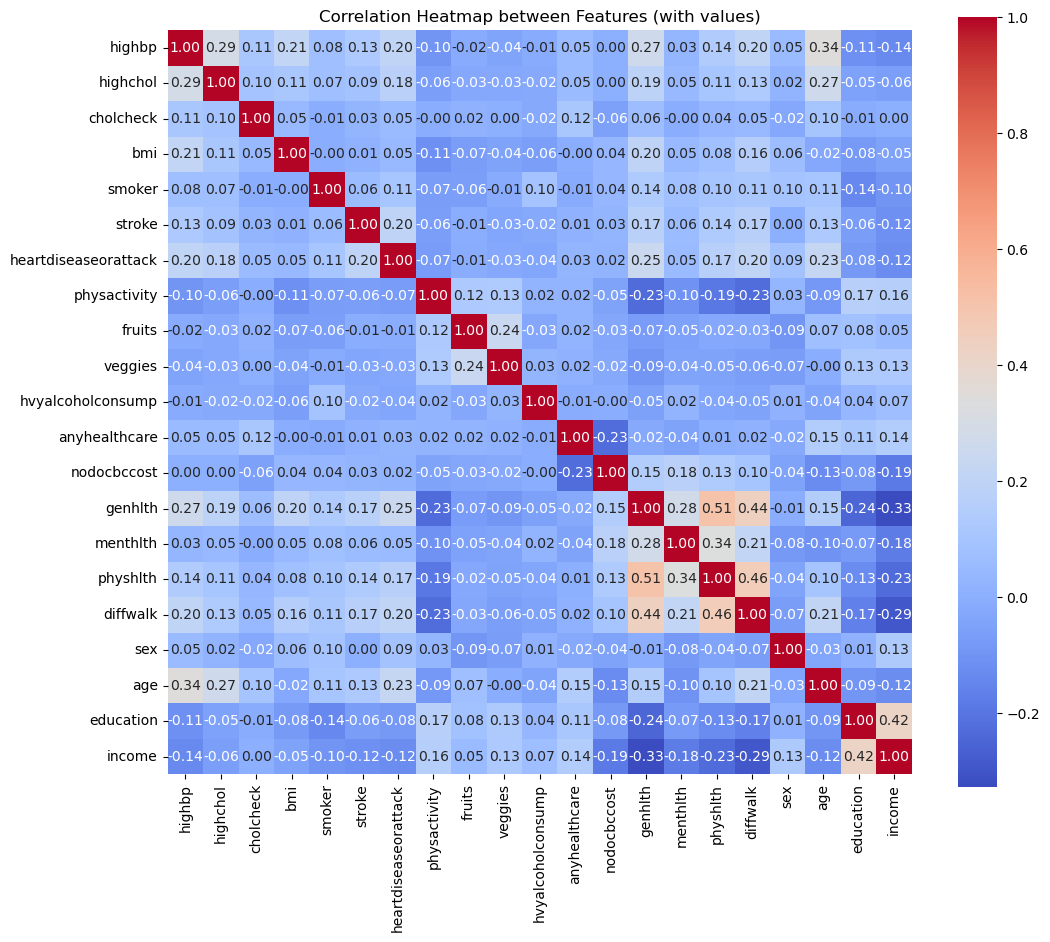

Pairs of features with high correlation (>|0.9|):
Features removed due to high correlation: set()
Dataset dimensions after feature reduction: (179314, 21)


In [ ]:
# 5. Correlation analysis between features (to check for highly similar columns for removal)

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure X_train (training data) is defined after the split
# 1. Calculate the correlation matrix
correlation_matrix = X_train.corr()

# 2. Visualize the correlation matrix with numbers inside each square
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True, cbar=True)
plt.title("Correlation Heatmap between Features (with values)")
plt.show()

# 3. Identify pairs of highly correlated features
threshold = 0.9  # Define a threshold for high correlation
high_corr_pairs = []

# Iterate over the correlation matrix to find high correlations
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            high_corr_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j],
                                    correlation_matrix.iloc[i, j]))

# Display highly correlated feature pairs
print("Pairs of features with high correlation (>|0.9|):")
for pair in high_corr_pairs:
    print(f"{pair[0]} and {pair[1]} - Correlation: {pair[2]:.2f}")

# 4. Optional: Drop one variable from each pair of highly correlated features
# For simplicity, drop the second feature in each pair:
features_to_drop = set([pair[1] for pair in high_corr_pairs])
X_train_reduced = X_train.drop(columns=features_to_drop)
X_test_reduced = X_test.drop(columns=features_to_drop)

print(f"Features removed due to high correlation: {features_to_drop}")
print(f"Dataset dimensions after feature reduction: {X_train_reduced.shape}")


In [ ]:
# # Mostrar todas las columnas del DataFrame
# print("Columnas disponibles en el DataFrame:")
# print(df.columns)



Columnas disponibles en el DataFrame:
Index(['diabetes_012', 'highbp', 'highchol', 'cholcheck', 'bmi', 'smoker',
       'stroke', 'heartdiseaseorattack', 'physactivity', 'fruits', 'veggies',
       'hvyalcoholconsump', 'anyhealthcare', 'nodocbccost', 'genhlth',
       'menthlth', 'physhlth', 'diffwalk', 'sex', 'age', 'education',
       'income'],
      dtype='object')


In [ ]:

from sklearn.preprocessing import StandardScaler  

# Lista de características continuas que se escalarán
continuous_features = ['age', 'bmi', 'income', 'menthlth', 'physhlth', 'education']  # Ajustar si es necesario

# Escalador StandardScaler (Media=0, Desviación Estándar=1)
scaler = StandardScaler()

# Escalar solo las características continuas en el conjunto de entrenamiento
X_train_scaled = X_train.copy()
X_train_scaled[continuous_features] = scaler.fit_transform(X_train[continuous_features])

# Usar el mismo escalador para transformar el conjunto de prueba
X_test_scaled = X_test.copy()
X_test_scaled[continuous_features] = scaler.transform(X_test[continuous_features])

# Verificar resultados del escalado
print("Características continuas escaladas:")
print(f"Media de entrenamiento después del escalado:\n{X_train_scaled[continuous_features].mean()}")
print(f"Desviación estándar de entrenamiento después del escalado:\n{X_train_scaled[continuous_features].std()}")






Características continuas escaladas:
Media de entrenamiento después del escalado:
age         -6.658090e-16
bmi         -8.071201e-16
income       3.333012e-16
menthlth    -5.653395e-17
physhlth    -1.952825e-16
education   -9.455434e-16
dtype: float64
Desviación estándar de entrenamiento después del escalado:
age          1.000001
bmi          1.000001
income       1.000001
menthlth     1.000001
physhlth     1.000001
education    1.000001
dtype: float64


In [132]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Paso 1: Crear un dataset para el Modelo 1 (Clasificador 0 vs no-0)
# Etiquetas binarias: 0 para la Clase `0`, 1 para Clases `1` y `2`
y_binary = (y_train != 0).astype(int)  # Etiqueta binaria: 0 (Clase `0`), 1 (Clases `1` y `2`)
X_train_m1, X_val_m1, y_train_m1, y_val_m1 = train_test_split(X_train_scaled, y_binary, test_size=0.2, random_state=42)

# Modelo 1: Clasificador para `0` vs `1`/`2`
model_1 = RandomForestClassifier(random_state=42)
model_1.fit(X_train_m1, y_train_m1)

# Evaluar Modelo 1
y_pred_m1 = model_1.predict(X_val_m1)
print("Modelo 1 (0 vs no-0):")
print(confusion_matrix(y_val_m1, y_pred_m1))
print(classification_report(y_val_m1, y_pred_m1))

# Paso 2: Crear un dataset para el Modelo 2 (Clasificador 1 vs 2)
# Filtrar instancias de Clases `1` y `2` (excluyendo las instancias de Clase `0`)
mask = y_train != 0
X_train_m2 = X_train_scaled[mask]
y_train_m2 = y_train[mask]

# Entrenar el Modelo 2
X_train_m2, X_val_m2, y_train_m2, y_val_m2 = train_test_split(X_train_m2, y_train_m2, test_size=0.2, random_state=42)
model_2 = RandomForestClassifier(random_state=42)
model_2.fit(X_train_m2, y_train_m2)

# Evaluar Modelo 2
y_pred_m2 = model_2.predict(X_val_m2)
print("Modelo 2 (1 vs 2):")
print(confusion_matrix(y_val_m2, y_pred_m2))
print(classification_report(y_val_m2, y_pred_m2))

# Paso 3: Combinación de predicciones
def combined_model_predict(X):
    # Usar el Modelo 1 para predecir `0` vs `1`/`2`
    pred_m1 = model_1.predict(X)
    
    # Usar el Modelo 2 para predecir `1` vs `2` en las instancias que no son `0`
    pred_m2 = model_2.predict(X[pred_m1 == 1])
    
    # Combinar resultados
    final_pred = np.zeros(len(X), dtype=int)  # Inicialmente, todas las predicciones son `0`
    final_pred[pred_m1 == 1] = pred_m2  # Sustituir con predicciones de Modelo 2
    return final_pred

# Paso 4: Evaluar el modelo combinado
y_pred_combined = combined_model_predict(X_test_scaled)

print("Modelo combinado:")
print(confusion_matrix(y_test, y_pred_combined))
print(classification_report(y_test, y_pred_combined))


Modelo 1 (0 vs no-0):
[[28154  1702]
 [ 4356 55351]]
              precision    recall  f1-score   support

           0       0.87      0.94      0.90     29856
           1       0.97      0.93      0.95     59707

    accuracy                           0.93     89563
   macro avg       0.92      0.94      0.93     89563
weighted avg       0.94      0.93      0.93     89563

Modelo 2 (1 vs 2):
[[28730   948]
 [  653 29417]]
              precision    recall  f1-score   support

         1.0       0.98      0.97      0.97     29678
         2.0       0.97      0.98      0.97     30070

    accuracy                           0.97     59748
   macro avg       0.97      0.97      0.97     59748
weighted avg       0.97      0.97      0.97     59748

Modelo combinado:
[[35350    56  2110]
 [  745 35951   628]
 [ 4666   832 31616]]
              precision    recall  f1-score   support

         0.0       0.87      0.94      0.90     37516
         1.0       0.98      0.96      0.97     3732

In [137]:
import pandas as pd
from sklearn.inspection import permutation_importance

# Nombres reales de las columnas (sin `diabetes_012`, que es la variable dependiente)
column_names = [
    'highbp', 'highchol', 'cholcheck', 'bmi', 'smoker', 'stroke',
    'heartdiseaseorattack', 'physactivity', 'fruits', 'veggies',
    'hvyalcoholconsump', 'anyhealthcare', 'nodocbccost', 'genhlth',
    'menthlth', 'physhlth', 'diffwalk', 'sex', 'age', 'education', 'income'
]

# **1. Modelo 1: Random Forest (0 vs no-0)**
rf_importance_m1 = pd.DataFrame({
    'Feature': column_names,
    'Importance': model_1.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Importancia de características (Random Forest - Modelo 1):")
print(rf_importance_m1.head(10))

# **2. Modelo 2: Random Forest (1 vs 2)**
rf_importance_m2 = pd.DataFrame({
    'Feature': column_names,
    'Importance': model_2.feature_importances_
}).sort_values(by='Importance', ascending=False)


Importancia de características (Random Forest - Modelo 1):
      Feature  Importance
0      highbp    0.131163
1    highchol    0.118224
13    genhlth    0.111870
3         bmi    0.095626
18        age    0.090913
20     income    0.056581
17        sex    0.047304
19  education    0.044781
4      smoker    0.044623
8      fruits    0.038864


In [123]:
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Paso 1: Configurar los pesos para priorizar recall de todas las clases
class_weights = {0: 1.5, 1: 3, 2: 2.5}  # Mayor peso para Clases 1 y 2

# Paso 2: Configurar LightGBM con hiperparámetros ajustados
lgbm_model = LGBMClassifier(
    objective='multiclass',    # Clasificación multiclas
    boosting_type='gbdt',      # Gradient Boosting Decision Trees
    num_leaves=80,             # Más hojas para captar relaciones complejas
    learning_rate=0.08,        # Tasa de aprendizaje más baja para entrenamiento más refinado
    n_estimators=500,          # Más árboles para mejorar precisión
    max_depth=15,              # Limitar profundidad para evitar sobreajuste
    min_child_samples=3,      # Captar divisiones en subconjuntos pequeños
    class_weight=class_weights, # Pesos ajustados para priorizar recall
    random_state=42            # Reproducibilidad
)

# Paso 3: Entrenar el modelo
lgbm_model.fit(X_train_scaled, y_train)

# Paso 4: Predicción con ajuste de umbrales para cada clase
y_proba = lgbm_model.predict_proba(X_test_scaled)
y_pred_adjusted = []

# Ajustar umbrales para reducir falsos negativos en cada clase
thresholds = {0: 0.35, 1: 0.35, 2: 0.35}  # Personalizado para cada clase

for prob in y_proba:
    if prob[2] >= thresholds[2]:         # Probabilidad para Clase 2
        y_pred_adjusted.append(2)
    elif prob[1] >= thresholds[1]:       # Probabilidad para Clase 1
        y_pred_adjusted.append(1)
    else:
        y_pred_adjusted.append(0)        # Clase 0 como predicción por defecto

# Paso 5: Evaluar el modelo
print("Matriz de Confusión (LightGBM ajustado):")
print(confusion_matrix(y_test, y_pred_adjusted))

print("\nReporte de Clasificación (LightGBM ajustado):")
print(classification_report(y_test, y_pred_adjusted))

# Paso 6: Analizar la importancia de las características
feature_importances = lgbm_model.feature_importances_
print("\nImportancia de características (LightGBM):")
for i, importance in enumerate(feature_importances):
    print(f"Feature {i}: {importance}")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008241 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5354
[LightGBM] [Info] Number of data points in the train set: 447813, number of used features: 21
[LightGBM] [Info] Start training from score -1.541959
[LightGBM] [Info] Start training from score -0.847525
[LightGBM] [Info] Start training from score -1.028440
Matriz de Confusión (LightGBM ajustado):
[[30819     8  6689]
 [  623 33662  3039]
 [ 2405  1339 33370]]

Reporte de Clasificación (LightGBM ajustado):
              precision    recall  f1-score   support

         0.0       0.91      0.82      0.86     37516
         1.0       0.96      0.90      0.93     37324
         2.0       0.77      0.90      0.83     37114

    accuracy                           0.87    111954
   macro avg       0.88      0.87      0.88    111954
weight

In [138]:
import pandas as pd

# Nombres reales de las columnas
column_names = [
    'highbp', 'highchol', 'cholcheck', 'bmi', 'smoker', 'stroke',
    'heartdiseaseorattack', 'physactivity', 'fruits', 'veggies',
    'hvyalcoholconsump', 'anyhealthcare', 'nodocbccost', 'genhlth',
    'menthlth', 'physhlth', 'diffwalk', 'sex', 'age', 'education', 'income'
]

# Importancia de características para LightGBM
lgbm_importance = pd.DataFrame({
    'Feature': column_names,
    'Importance': lgbm_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nImportancia de características (LightGBM):")
print(lgbm_importance.head(10))



Importancia de características (LightGBM):
      Feature  Importance
3         bmi       18848
18        age       14145
20     income       11322
15   physhlth       10303
14   menthlth        9503
13    genhlth        7637
19  education        7557
17        sex        3805
4      smoker        3730
8      fruits        3684


In [128]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Paso 1: Configurar el modelo MLPClassifier
mlp_model = MLPClassifier(
    hidden_layer_sizes=(128, 64),  # Dos capas ocultas con 128 y 64 neuronas
    activation='relu',            # Función de activación ReLU
    solver='adam',                # Optimizador Adam para el entrenamiento
    learning_rate_init=0.001,     # Tasa de aprendizaje inicial
    max_iter=300,                 # Número máximo de iteraciones para entrenar
    random_state=42               # Para reproducibilidad
)

# Paso 2: Entrenar el modelo
mlp_model.fit(X_train_scaled, y_train)

# Paso 3: Hacer predicciones en el conjunto de prueba
y_pred_mlp = mlp_model.predict(X_test_scaled)

# Paso 4: Evaluar el modelo
print("Matriz de Confusión (MLPClassifier):")
print(confusion_matrix(y_test, y_pred_mlp))

print("\nReporte de Clasificación (MLPClassifier):")
print(classification_report(y_test, y_pred_mlp))
 

/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Matriz de Confusión (MLPClassifier):
[[33614   791  3111]
 [ 1580 31100  4644]
 [ 5804  4368 26942]]

Reporte de Clasificación (MLPClassifier):
              precision    recall  f1-score   support

         0.0       0.82      0.90      0.86     37516
         1.0       0.86      0.83      0.85     37324
         2.0       0.78      0.73      0.75     37114

    accuracy                           0.82    111954
   macro avg       0.82      0.82      0.82    111954
weighted avg       0.82      0.82      0.82    111954



In [139]:
from sklearn.inspection import permutation_importance
import pandas as pd

# Nombres reales de las columnas
column_names = [
    'highbp', 'highchol', 'cholcheck', 'bmi', 'smoker', 'stroke',
    'heartdiseaseorattack', 'physactivity', 'fruits', 'veggies',
    'hvyalcoholconsump', 'anyhealthcare', 'nodocbccost', 'genhlth',
    'menthlth', 'physhlth', 'diffwalk', 'sex', 'age', 'education', 'income'
]

# Calcular la importancia por permutación
perm_importance_mlp = permutation_importance(mlp_model, X_test_scaled, y_test, n_repeats=10, random_state=42)

# Crear un DataFrame con las importancias
mlp_importance = pd.DataFrame({
    'Feature': column_names,
    'Importance': perm_importance_mlp.importances_mean
}).sort_values(by='Importance', ascending=False)

print("\nImportancia de características (MLPClassifier):")
print(mlp_importance.head(10))



Importancia de características (MLPClassifier):
         Feature  Importance
3            bmi    0.123853
1       highchol    0.122155
17           sex    0.119913
4         smoker    0.116216
0         highbp    0.115747
18           age    0.114896
20        income    0.110904
8         fruits    0.109828
13       genhlth    0.105356
7   physactivity    0.096360
